<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [5]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


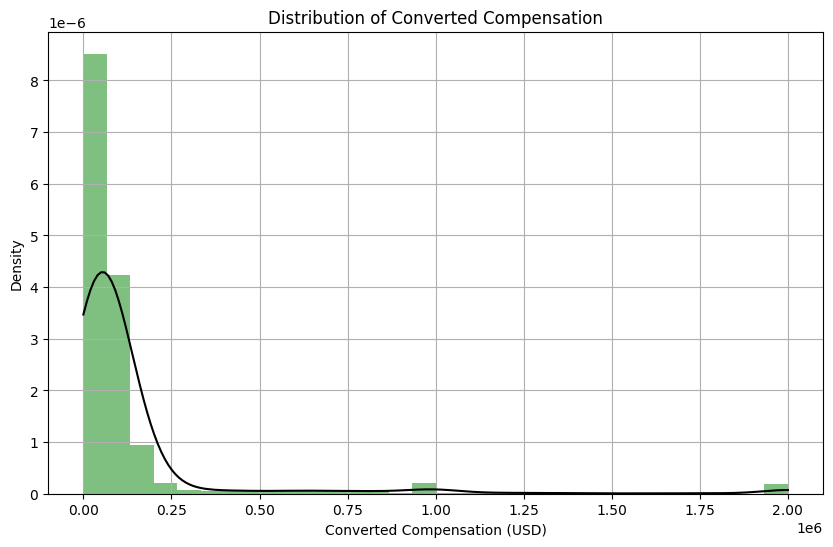

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Drop missing values from ConvertedComp
data = df['ConvertedComp'].dropna()

# Calculate the point density
density = gaussian_kde(data)
xs = np.linspace(data.min(), data.max(), 200)
density.covariance_factor = lambda : .25
density._compute_covariance()

# Plot the distribution curve
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.5, color='g')
plt.plot(xs, density(xs), 'k')
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Plot the histogram for the column `ConvertedComp`.


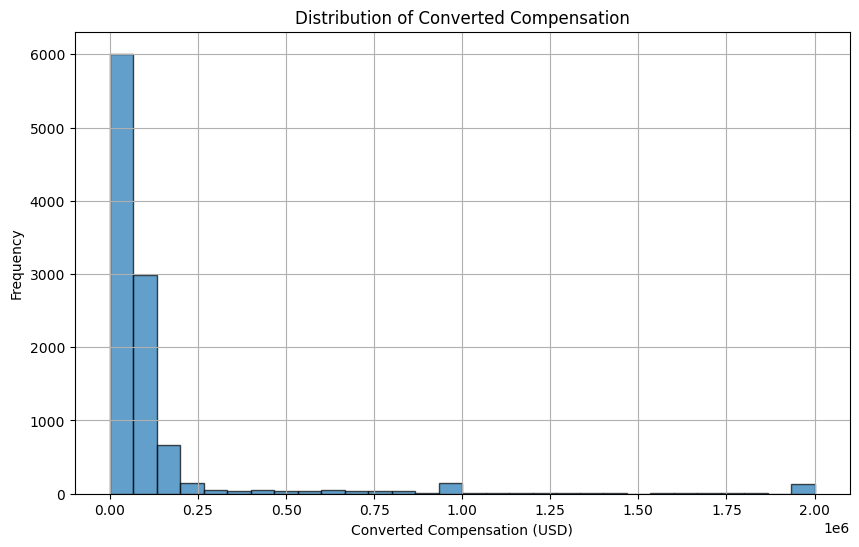

In [8]:
# your code goes here
# Plot the histogram for the column ConvertedComp
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

What is the median of the column `ConvertedComp`?


In [14]:
# your code goes here

# Calculate the median of the column ConvertedComp
median_converted_comp = df['ConvertedComp'].median()

# Print the median
print(f"The median of the column ConvertedComp is: {median_converted_comp}")

The median of the column ConvertedComp is: 57745.0


How many responders identified themselves only as a **Man**?


In [15]:
# your code goes here
# Count the number of respondents who identified themselves only as a man
num_men = df[df['Gender'] == 'Man'].shape[0]

# Print the result
print(f"The number of respondents who identified themselves only as a man is: {num_men}")

The number of respondents who identified themselves only as a man is: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [16]:
# your code goes here
# Filter the DataFrame for respondents who identified themselves only as a woman
women_df = df[df['Gender'] == 'Woman']

# Calculate the median of the column ConvertedComp for these respondents
median_converted_comp_women = women_df['ConvertedComp'].median()

# Print the result
print(f"The median ConvertedComp of respondents who identified themselves only as a woman is: {median_converted_comp_women}")

The median ConvertedComp of respondents who identified themselves only as a woman is: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [17]:
# your code goes here
# Calculate the five-number summary for the column Age
age_summary = df['Age'].describe(percentiles=[0.25, 0.5, 0.75])

# Extract the required values
min_age = age_summary['min']
q1_age = age_summary['25%']
median_age = age_summary['50%']
q3_age = age_summary['75%']
max_age = age_summary['max']

# Print the five-number summary
print(f"Five-number summary for the column Age:\nMin: {min_age}\nQ1: {q1_age}\nMedian: {median_age}\nQ3: {q3_age}\nMax: {max_age}")


Five-number summary for the column Age:
Min: 16.0
Q1: 25.0
Median: 29.0
Q3: 35.0
Max: 99.0


Plot a histogram of the column `Age`.


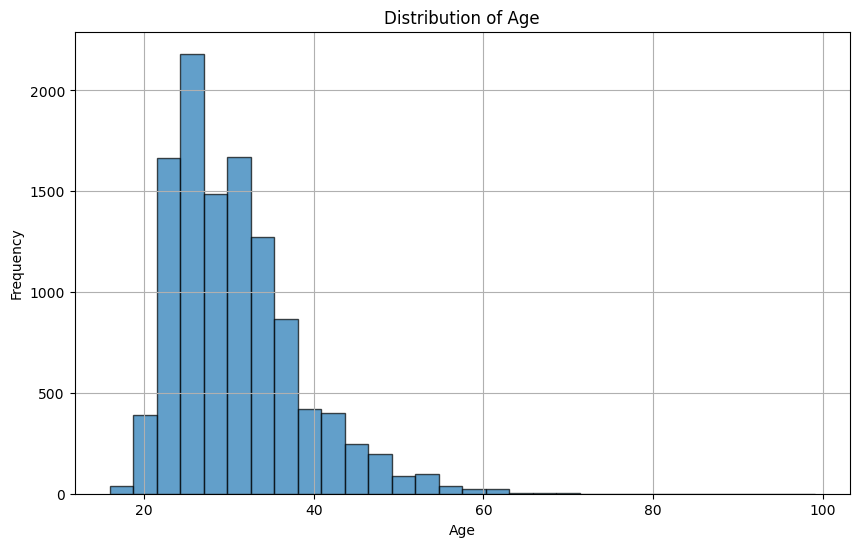

In [21]:
# your code goes here
# Plot the histogram for the column Age
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


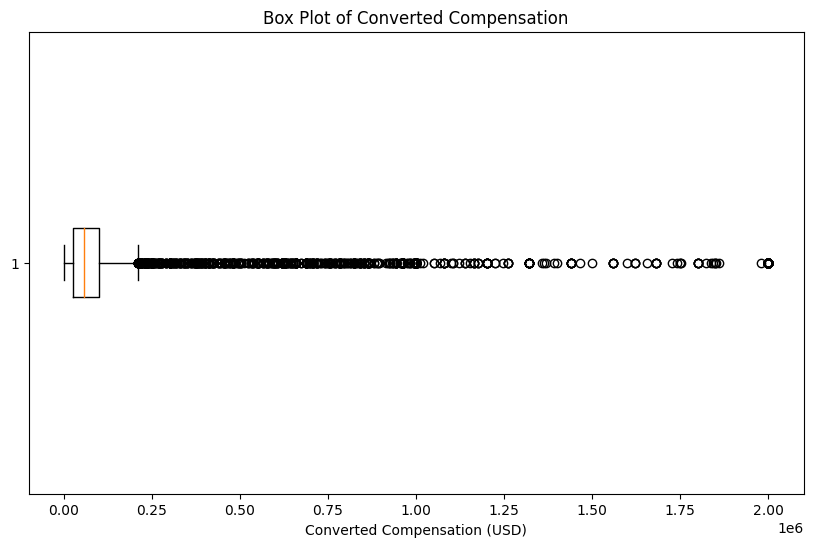

In [22]:
# your code goes here
# Plot the box plot for the column ConvertedComp
plt.figure(figsize=(10, 6))
plt.boxplot(df['ConvertedComp'].dropna(), vert=False)
plt.title('Box Plot of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [23]:
# your code goes here
# Calculate the first and third quartiles (Q1 and Q3)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Print the IQR
print(f"The Inter Quartile Range (IQR) for the column ConvertedComp is: {IQR}")

The Inter Quartile Range (IQR) for the column ConvertedComp is: 73132.0


Find out the upper and lower bounds.


In [24]:
# your code goes here
# Calculate the first and third quartiles (Q1 and Q3)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Calculate the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the bounds
print(f"The lower bound is: {lower_bound}")
print(f"The upper bound is: {upper_bound}")

The lower bound is: -82830.0
The upper bound is: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [25]:
# your code goes here
# Calculate the first and third quartiles (Q1 and Q3)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Calculate the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]

# Print the number of outliers
print(f"The number of outliers in the 'ConvertedComp' column is: {num_outliers}")

The number of outliers in the 'ConvertedComp' column is: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [26]:
# your code goes here
# Calculate the first and third quartiles (Q1 and Q3)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Calculate the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame by removing the outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [27]:
# your code goes here
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the correlation of Age with all other numerical columns
age_correlation = correlation_matrix['Age']

# Print the correlation values
print(age_correlation)

<ipython-input-27-8f6d0b269572>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


In [30]:
# Calculate the median of the column Age
median_age = df['Age'].median()

# Print the result
print(f"The median age of the survey respondents is: {median_age}")

The median age of the survey respondents is: 29.0


In [29]:
# Filter the DataFrame for respondents who identified themselves only as a woman
women_df = df[df['Gender'] == 'Woman']

# Calculate the median of the column ConvertedComp for these respondents
median_converted_comp_women = women_df['ConvertedComp'].median()

# Print the result
print(f"The median ConvertedComp of respondents who identified themselves only as a woman is: {median_converted_comp_women}")

The median ConvertedComp of respondents who identified themselves only as a woman is: 57708.0


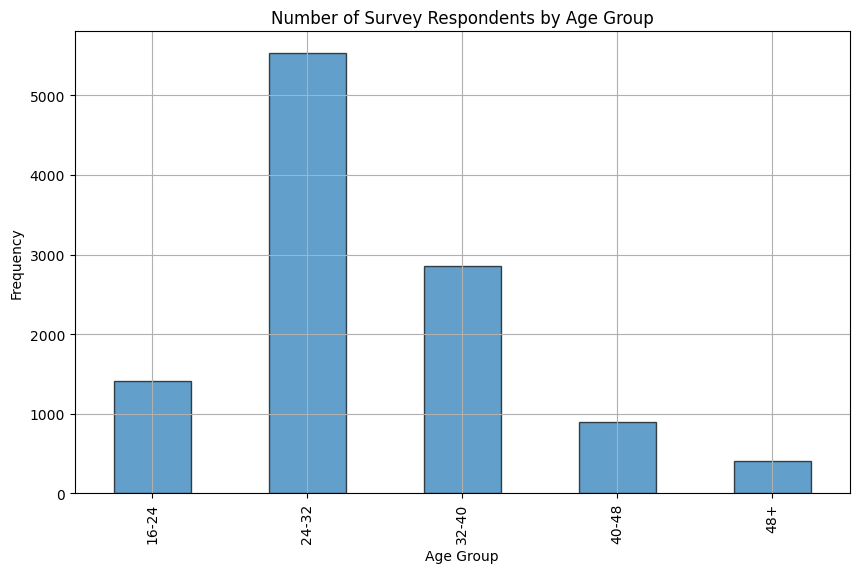

The age group with the highest number of survey respondents is: 24-32


In [31]:
# Define age bins
age_bins = [16, 24, 32, 40, 48, df['Age'].max()]

# Define age group labels
age_labels = ['16-24', '24-32', '32-40', '40-48', '48+']

# Create a new column for age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Plot the histogram for the age groups
plt.figure(figsize=(10, 6))
df['AgeGroup'].value_counts().sort_index().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title('Number of Survey Respondents by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Find the age group with the highest number of respondents
most_common_age_group = df['AgeGroup'].value_counts().idxmax()

# Print the most common age group
print(f"The age group with the highest number of survey respondents is: {most_common_age_group}")

In [32]:
# Calculate the median of the column ConvertedComp
median_converted_comp = df['ConvertedComp'].median()

# Print the result
print(f"The median ConvertedComp before removing outliers is: {median_converted_comp}")

The median ConvertedComp before removing outliers is: 57745.0


In [33]:
# Calculate the first and third quartiles (Q1 and Q3)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Calculate the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame by removing the outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Calculate the median of the column ConvertedComp after removing outliers
median_converted_comp_no_outliers = df_no_outliers['ConvertedComp'].median()

# Print the result
print(f"The median ConvertedComp after removing outliers is: {median_converted_comp_no_outliers}")

The median ConvertedComp after removing outliers is: 52704.0


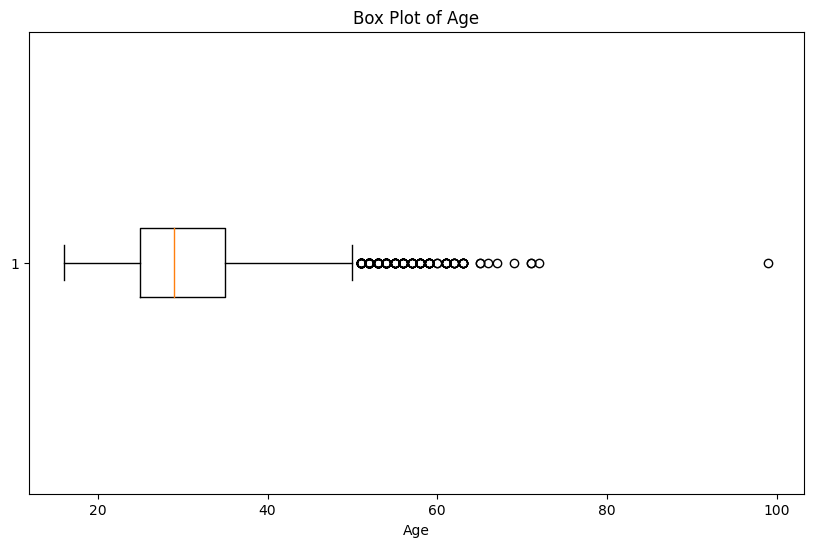

The number of outliers below Q1 for the 'Age' column is: 0


In [35]:
# Calculate the first quartile (Q1) and the Inter Quartile Range (IQR)
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower bound for outliers
lower_bound = Q1 - 1.5 * IQR

# Identify the outliers below Q1
outliers_below_Q1 = df[df['Age'] < lower_bound]

# Count the number of outliers below Q1
num_outliers_below_Q1 = outliers_below_Q1.shape[0]

# Plot the box plot for 'Age'
plt.figure(figsize=(10, 6))
plt.boxplot(df['Age'].dropna(), vert=False)
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

# Print the number of outliers below Q1
print(f"The number of outliers below Q1 for the 'Age' column is: {num_outliers_below_Q1}")


In [36]:
# Calculate the first and third quartiles (Q1 and Q3)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Calculate the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame by removing the outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Calculate the mean of the column ConvertedComp after removing outliers
mean_converted_comp_no_outliers = df_no_outliers['ConvertedComp'].mean()

# Print the result
print(f"The mean ConvertedComp after removing outliers is: {mean_converted_comp_no_outliers}")

The mean ConvertedComp after removing outliers is: 59883.20838915799


In [38]:
# Calculate the correlation matrix with numeric_only=True
correlation_matrix = df.corr(numeric_only=True)

# Get the correlation of Age with all other numerical columns
age_correlation = correlation_matrix['Age']

# Identify columns with negative correlation
negative_correlation = age_correlation[age_correlation < 0]

# Print the columns with negative correlation
print("Columns with negative correlation with 'Age':")
print(negative_correlation)

Columns with negative correlation with 'Age':
CodeRevHrs   -0.020469
Name: Age, dtype: float64


In [40]:
# Calculate the correlation matrix with numeric_only=True
correlation_matrix = df.corr(numeric_only=True)

# Get the correlation of Age with all other numerical columns
age_correlation = correlation_matrix['Age']

# Identify the column with the highest correlation with Age
highest_correlation_column = age_correlation.idxmax()
highest_correlation_value = age_correlation.max()

# Print the result
print(f"The column with the highest correlation with 'Age' is: {highest_correlation_column} with a correlation value of {highest_correlation_value}")

The column with the highest correlation with 'Age' is: Age with a correlation value of 1.0


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
